In this Notebook we plot the results of comparing GC between conditions and
directions of information flow from VAR simulated time series.

When comparing GC between distinct conditions, VAR time series are simulated from different random stable VAR models so we should expect to see a difference in GC between conditions or directions of information flow. 

When comparing GC between directions of information flow, we have a ground truth with higher BU vs TD information flow (the ground truth connectivity matrix is C =[[1,1],[0,1]])

In [1]:
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns

from src.preprocessing_lib import EcogReader, parcellation_to_indices
from scipy.io import loadmat
from pathlib import Path



In [54]:
# Plotting settings
plt.style.use('ggplot')
fig_width = 28  # figure width in cm
inches_per_cm = 0.393701               # Convert cm to inch
golden_mean = (np.sqrt(5)-1.0)/2.0         # Aesthetic ratio
fig_width = fig_width*inches_per_cm  # width in inches
fig_height = fig_width*golden_mean      # height in inches
fig_size =  [fig_width,fig_height]
label_size = 14
tick_size = 12
params = {'backend': 'ps',
          'lines.linewidth': 1.5,
          'axes.labelsize': label_size,
          'axes.titlesize': label_size,
          'font.size': label_size,
          'legend.fontsize': tick_size,
          'xtick.labelsize': tick_size,
          'ytick.labelsize': tick_size,
          'text.usetex': False,
          'figure.figsize': fig_size,
          "font.weight": "bold",
          "axes.labelweight": "bold"}
plt.rcParams.update(params)

In [58]:
# Plotting functions to compare GC between conditions
def plot_compare_condition_GC(F, cmap='BrBg_r',
                       vmin = -5, vmax=5):
    """
    We plot Z score from comparing permutation group F in condition 1 with
    condition 2.
    """
    # xticks
    # Get statistics from matlab analysis
    z = F['z'][0][0]
    zcrit = F['zcrit'][0][0]
    sig = F['sig'][0][0]
    np.fill_diagonal(sig, 0)
    annotations = np.where(sig == 1, "*", "")
    # Plot Z score as a heatmap with statistical significant entries.
    sns.set()
    fig, ax = plt.subplots()
    sns.heatmap(z, annot=annotations, fmt="", vmin=vmin, vmax=vmax, cmap=cmap)
    ax.set_xlabel('From')
    ax.set_ylabel('to')
    plt.show()
    # Plot statistical significant entries 
    print(f"\n Critical Z score is {zcrit}\n")




In [62]:
cmap ='PuOr_r'
connect = 'pairwise'
band = '[0 125]'
# Useful paths
cifar_path = Path('~','projects','cifar').expanduser()
data_path = cifar_path.joinpath('data')
result_path = cifar_path.joinpath('results')
fname = "compare_condition_simulated_GC_" + connect + '_' + band + "Hz.mat"
path = result_path
fpath = path.joinpath(fname)
# Read dataset
dataset = loadmat(fpath)
F = dataset['GC']
vmax = 5
vmin = -vmax

We compare GC between different simulated conditions

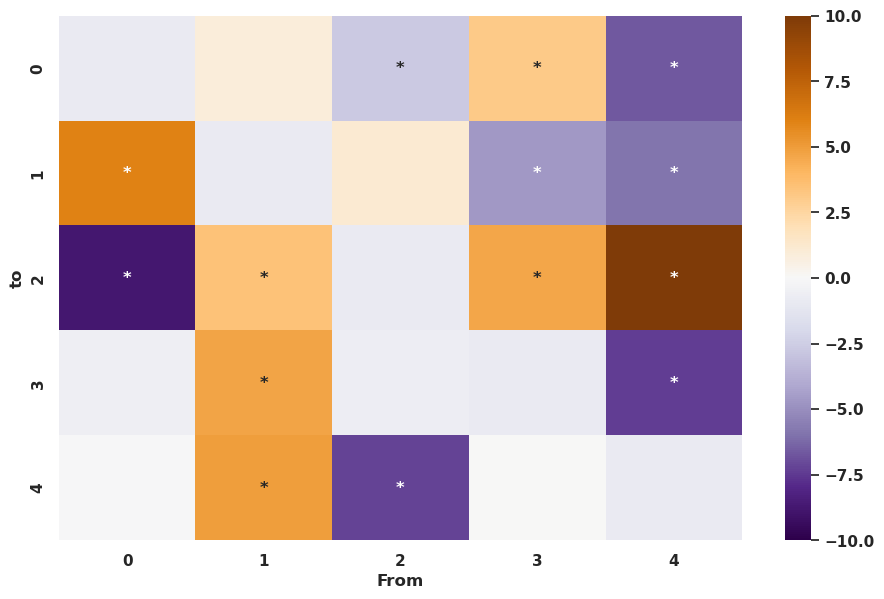


 Critical Z score is [[1.96]]



In [63]:
%matplotlib inline
plot_compare_condition_GC(F, cmap=cmap,
                       vmin = -10, vmax=10)

Now that we have compared GC between conditions, we compare TD and BU
GC

In [98]:
cmap ='PuOr_r'
connect = 'pairwise'
band = '[0 125]'
# Useful paths
cifar_path = Path('~','projects','cifar').expanduser()
data_path = cifar_path.joinpath('data')
result_path = cifar_path.joinpath('results')
fname = "compare_ts_bu_simulated_GC_" + connect + '_' + band + "Hz.mat"
path = result_path
fpath = path.joinpath(fname)
# Read dataset
dataset = loadmat(fpath)
F = dataset['GC']
print(F)
vmax = 5
vmin = -vmax

[[(array([[-91.98927307]]), array([[0]], dtype=uint8), array([[0]], dtype=uint8), array([[inf]]), array([[  0, 125]], dtype=uint8), array(['pairwise'], dtype='<U8'))]]


In [109]:
def plot_top_down_z(F,cmap ='PuOr_r', vmin = -3, vmax=3):
    zcrit = 1.96
    z = F['z'][0][0]
    vmax = np.amax(np.abs(z))
    vmin = - vmax
    sig = np.where(np.abs(z) > zcrit, 1, 0)
    print(sig)
    fig, ax = plt.subplots()
    annotations = np.where(sig == 1, "*", "")
    # Plot Z score as a heatmap
    sns.heatmap(z, annot=annotations, fmt="", vmin=vmin, vmax=vmax, cmap=cmap)

[[1]]


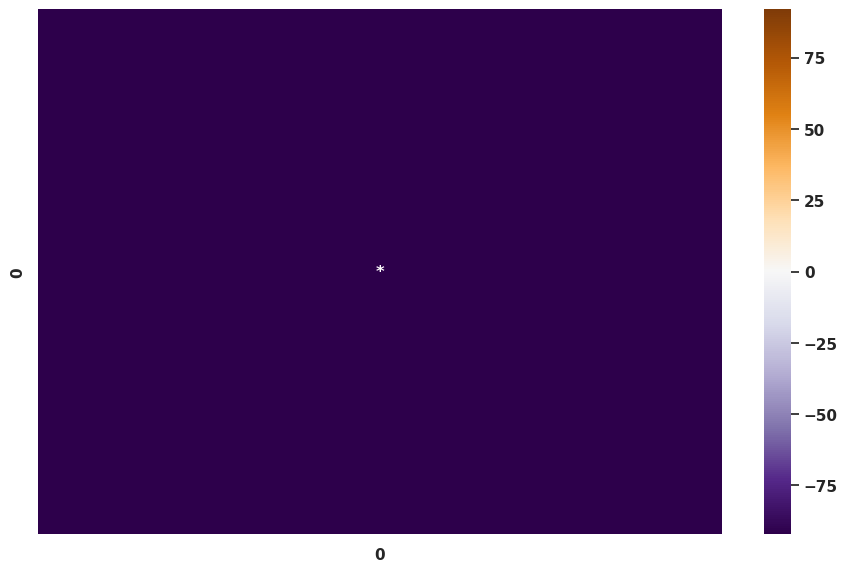

In [110]:
%matplotlib inline
plot_top_down_z(F, cmap=cmap,
                       vmin = -20, vmax=20)